# Install libraries

In [ ]:
!pip install torchtext==0.11
!pip install nlpaug==1.1.10
!pip install nltk
!pip install pytorch-lightning==1.6.1
import pytorch_lightning as pl
!pip install panda==1.1.5
!pip install protobuf==3.19.4
!pip install sklearn=="0.22.2.post1"
!pip install wandb==0.12.14
!pip install seaborn==0.11.2
!pip install h5py=3.6.0
!pip install rich==11.2.0
!pip install transformers==4.17.0
!pip install tokenizers==0.11.5
!pip uninstall tensorflow -y
from transformers import BertTokenizerFast as BertTokenizer
!pip install torchmetrics==1.7.0
!pip3 install torch==1.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
!pip install bitsandbytes-cuda113
#!wget https://gist.githubusercontent.com/TimDettmers/1f5188c6ee6ed69d211b7fe4e381e713/raw/4d17c3d09ccdb57e9ab7eca0171f2ace6e4d2858/check_bnb_install.py && python check_bnb_install.py
!pip install matplotlib>3.1
!pip install horovod>=0.21.2,!=0.24.0  # no need to install with [pytorch] as pytorch is already installed
!pip install torchtext>=0.9.*
!pip install omegaconf>=2.0.5
!pip install hydra-core>=1.0.5
!pip install jsonargparse[signatures]>=4.6.0
!pip install gcsfs>=2021.5.0
!pip install rich>=10.2.2,!=10.15.*

/usr/local/lib/python3.7/dist-packages/horovod/common/util.py:258: UserWarning: Framework pytorch installed with version 1.10.1+cu113 but found version 1.10.0+cu102.
             This can result in unexpected behavior including runtime errors.
             Reinstall Horovod using `pip install --no-cache-dir` to build with the new version.
  warnings.warn(get_version_mismatch_message(name, version, installed_version))


ERROR: Could not find a version that satisfies the requirement panda==1.1.5 (from versions: 0.1.5.macosx-10.9-x86_64, 0.1.1, 0.1.2, 0.1.3, 0.1.4, 0.1.5, 0.3.1)
ERROR: No matching distribution found for panda==1.1.5
ERROR: Could not find a version that satisfies the requirement sklearn==0.22.2.post1 (from versions: 0.0)
ERROR: No matching distribution found for sklearn==0.22.2.post1
ERROR: Invalid requirement: 'h5py=3.6.0'
Hint: = is not a valid operator. Did you mean == ?
ERROR: Could not find a version that satisfies the requirement torchmetrics==1.7.0 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.4.0, 0.4.1, 0.5.0, 0.5.1, 0.6.0rc0, 0.6.0rc1, 0.6.0, 0.6.1, 0.6.2, 0.7.0rc0, 0.7.0rc1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0rc0, 0.8.0)
ERROR: No matching distribution found for torchmetrics==1.7.0
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
tcmalloc: large alloc 1821458432 bytes == 0x563332336000 @  0x7fe50ad411e7 0x56332ea5e338 0x56332ea28ad7 0x56332eba7575 0x563

# Get the python library version

In [ ]:
import pandas as pd
import numpy as np
import os
import json
import sklearn
import math
from torch.utils.data import Dataset
from sklearn.model_selection import KFold
import pytorch_lightning as pl
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, random_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import seaborn as sns
import wandb
import matplotlib.pyplot as plt
import random
import h5py
from typing import Optional
import torchmetrics
from torch.autograd import Variable
from sklearn.decomposition import PCA
from rich import print
#from pytorch_lightning.callbacks import LearningRateLogger
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
plt.show()
from pytorch_lightning.loggers import TensorBoardLogger
import gc
gc.collect()
from sklearn.model_selection import train_test_split
torch.cuda.empty_cache()
import numpy as onp
import os.path as osp
from abc import ABC, abstractmethod
from copy import deepcopy
from dataclasses import dataclass
from typing import Any, Dict, List, Optional, Type
from pytorch_lightning.loops.base import Loop
from pytorch_lightning.loops.fit_loop import FitLoop
from pytorch_lightning.trainer.states import TrainerFn
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import Dataset, Subset
from sklearn.model_selection import KFold
import seaborn as sns
from pylab import rcParams
import wandb
from transformers import BertModel, BertConfig
import bitsandbytes as bnb
from transformers import DistilBertModel, DistilBertConfig , DistilBertTokenizerFast
import nlpaug.augmenter.word as naw
import nltk
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Constants

In [ ]:
LABEL_COLUMNS_NAME = "labels_ids"
weight_and_bias_project = "Github Multi-Label Classification"
BATCH_SIZE = 2<<4
N_EPOCHS = 20
MAX_TOKEN_LEN = 2<<8

# Library Version

In [ ]:
!python --version

Python 3.7.13


In [ ]:
!python collect_env_details.py
print( "Panda " , pd.__version__)
print( "Numpy" , np.__version__)
print("Weight and Bias Version" , wandb.__version__)
print("Sklearn" , sklearn.__version__)
print("Seabron" , sns.__version__)
print( "torch" , torch.__version__)
print("h5py" , h5py.__version__)
print("Torch Metric" , torchmetrics.__version__)
wandb.finish()
wandb.login(key="594c8e9a35d34a66e52ac0a49c6e08fdefda3053")
wandb.Api(timeout=19)
## Weight and bias

python3: can't open file 'collect_env_details.py': [Errno 2] No such file or directory


Panda  1.3.5

Numpy 1.21.5

Weight and Bias Version 0.12.14

Sklearn 1.0.2

Seabron 0.11.2

torch 1.10.0+cu102

h5py 3.1.0

Torch Metric 0.8.0

wandb: Currently logged in as: haruqhakim (use `wandb login --relogin` to force relogin)
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# 

#  Reduce the Randomness of the model

In [ ]:
from pytorch_lightning import Trainer, seed_everything
RANDOM_SEED = 42
seed_everything(RANDOM_SEED, workers=True)

Global seed set to 42


42

# Get access of hte dataset 

## Setup Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
wandb.finish()

Mounted at /content/drive/


## Create the dataset pandas dataframes

In [ ]:
def nlp_augmen():
  ##dataset
  ## loop through add augmenatition
  ## linear combinatino one type of combinary each one
  ## multiple combination. augmetnaino 
  ## will have tecxt functional tf-iff(text) = ouput
  ## appen`
  return 5
def get_dataset():
  file_path = "/content/drive/MyDrive/nlp_dataset_json"
  ## determine the size of the dataset
  files  = os.listdir(os.path.join(os.getcwd(),file_path))
  dataset = None
  #files=files[:100]
  for x in files:
    try:
      f = open(os.path.join(os.path.join(os.getcwd(),file_path), x))
      data = json.load(f)
      labels = []
      for x in  data["labels"]:
        labels.append(x["id"])
      if dataset is None:
        print(type(dataset))
      if dataset is not  None:
        dataset_object = [data['body'] , labels]
        dataset_object = np.asarray(dataset_object , dtype=object).reshape(1,2)
        dataset = pd.concat([pd.DataFrame(dataset_object , columns=["body" , "labels_ids"] , dtype=object) , dataset] , ignore_index=True , axis = 0)
      else:
        dataset_object = [data['body'] , labels]
        dataset_object = np.asarray(dataset_object , dtype=object).reshape(1,2)
        dataset = pd.DataFrame(dataset_object , columns=["body" , "labels_ids"] , dtype=object)
      f.close()
    except:
      print(f"The path file does not work {x}")
  ##convert the dataset to numpy because pandas give to much headache
  dataset.to_hdf( os.path.join((os.path.join(os.getcwd(),file_path)) , "data.h5") , key="df" , mode="w" , complib='blosc:zlib' , complevel=9)
  dataset = dataset.to_numpy()
  return dataset
file_path = "/content/drive/MyDrive/nlp_dataset_json"
dataset = get_dataset()

<class 'NoneType'>

The path file does not work data.h5

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2718: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['body', 'labels_ids'], dtype='object')]

  encoding=encoding,


In [ ]:
print(dataset[0])

['I am using Neptune.ML for logging, but I would like to keep the data for analysis 
locally.\r\n\r\nTrying to write a simple logger that dumps info to the CSV 
files.\r\n\r\n`train.csv` like:\r\n\r\n```\r\nstep, loss1, loss2\r\n1, 0.5, 0.4\r\n2, 0.4, 
0.12\r\n....\r\n```\r\n\r\n\r\n`val.csv` should look like:\r\n\r\n```\r\nepoch, loss1, 
loss2\r\n1, 0.6, 0.23\r\n2, 0.13245, 0.2134\r\n....\r\n```\r\n\r\nI am looking at the docs at
https://pytorch-lightning.readthedocs.io/en/latest/loggers.html\r\n\r\nand at the examples in
https://github.com/PyTorchLightning/pytorch-lightning/tree/master/pytorch_lightning/loggers\r
\n\r\nand cannot figure out how to do this.\r\n\r\nIt would be nice if you extend the 
documentation with a more detailed example.'
 list([1840917107, 2253758944])]

## Preprocess

*   One Hot Encoding



In [ ]:
## find the number labels
one_hot_elements = dict()
for index  in range(dataset.shape[0]):
  #print(row["labels_ids"])
  for label in dataset[index][1]:
    if label in  one_hot_elements.keys():
      continue
    else:
      one_hot_elements[label] = len(one_hot_elements.keys())
def one_hot_encoder(labels):
  one_hot_label = np.zeros( ( len(one_hot_elements.keys())))
  for label in labels:
     one_hot_label[one_hot_elements[label]] = 1
  return one_hot_label

In [ ]:
one_hot_elements

{1297090686: 6,
 1297090687: 12,
 1297090688: 3,
 1297090689: 4,
 1297090690: 14,
 1297090692: 2,
 1297090693: 5,
 1475966033: 17,
 1819743298: 7,
 1840917107: 0,
 1851720487: 8,
 1851722664: 9,
 1862633788: 10,
 1893143017: 13,
 1934189816: 32,
 1934189817: 33,
 1934189818: 34,
 1934189821: 35,
 1973825445: 11,
 2014560835: 15,
 2122110652: 28,
 2237125337: 18,
 2240244232: 30,
 2244367919: 29,
 2245077676: 21,
 2251044906: 19,
 2253758944: 1,
 2324728524: 16,
 2368743110: 26,
 2477301440: 20,
 2477304581: 27,
 2604053872: 22,
 2604053874: 23,
 2604053875: 24,
 2615223038: 36,
 2651599587: 37,
 2823174111: 25,
 3240345158: 31}

## Pipeline Function

In [ ]:
from numpy.core.multiarray import datetime_as_string
def pipeline_function(dataset):
  indexes = []
  number_of_error = 0
  for x in range(dataset.shape[0]):
    ## check
    try:
      if len(dataset[x][0])>10:
        if len(dataset[x][1])>=1:
          indexes.append(x)
    except:
      number_of_error  = number_of_error +1
      print(f"The index {x} does not work")
      if number_of_error ==10:
        break
  ## add lemmatization for the data
  
  return indexes

indexes = pipeline_function(dataset)
print(indexes)

The index 774 does not work

[
    0,
    1,
    2,
    3,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    35,
    36,
    37,
    38,
    39,
    40,
    42,
    43,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    57,
    58,
    59,
    60,
    61,
    62,
    64,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    74,
    76,
    77,
    78,
    79,
    80,
    81,
    82,
    83,
    85,
    86,
    87,
    88,
    89,
    90,
    91,
    92,
    93,
    95,
    96,
    97,
    98,
    99,
    101,
    103,
    104,
    105,
    106,
    107,
    108,
    109,
    110,
    111,
    112,
    113,
    114,
    115,
    116,
    117,
    118,
    119,
    120,
    121,
    122,
    123,
    124,
    125,
    126,
    127,
    129,
    130,
    131,
    132,
    133,
    134,
    135,
    137,
    138,
    139,
    140,
    141,
    142,
    143,
    144,
    145,
    147,
    148,
    149,
    150,
    151,
    152,
    153,
    154,
    155,
    156,
    157,
    158,
    159,
    160,
    161,
    162,
    163,
    164,
    165,
    166,
    167,
    168,
    169,
    170,
    171,
    172,
    173,
    174,
    175,
    176,
    177,
    178,
    179,
    180,
    182,
    183,
    184,
    185,
    186,
    187,
    188,
    189,
    190,
    191,
    192,
    193,
    194,
    195,
    196,
    197,
    198,
    199,
    200,
    201,
    202,
    203,
    206,
    207,
    208,
    209,
    210,
    211,
    212,
    213,
    214,
    215,
    216,
    217,
    218,
    219,
    220,
    221,
    222,
    223,
    224,
    225,
    226,
    227,
    228,
    229,
    230,
    231,
    232,
    233,
    234,
    235,
    236,
    237,
    238,
    239,
    240,
    242,
    244,
    245,
    246,
    247,
    248,
    249,
    250,
    251,
    252,
    253,
    254,
    255,
    257,
    258,
    259,
    260,
    261,
    262,
    263,
    264,
    265,
    266,
    267,
    268,
    269,
    270,
    271,
    272,
    274,
    276,
    277,
    278,
    279,
    280,
    281,
    282,
    283,
    285,
    286,
    287,
    288,
    289,
    290,
    291,
    292,
    293,
    294,
    295,
    296,
    297,
    298,
    299,
    300,
    301,
    303,
    304,
    305,
    306,
    307,
    308,
    310,
    311,
    312,
    313,
    314,
    315,
    316,
    317,
    319,
    320,
    321,
    322,
    325,
    326,
    327,
    328,
    329,
    330,
    331,
    333,
    335,
    337,
    338,
    339,
    340,
    341,
    342,
    343,
    344,
    345,
    346,
    347,
    348,
    349,
    350,
    351,
    352,
    353,
    354,
    355,
    356,
    357,
    358,
    359,
    360,
    361,
    362,
    363,
    364,
    365,
    366,
    367,
    368,
    369,
    370,
    371,
    372,
    373,
    374,
    375,
    376,
    377,
    378,
    379,
    380,
    381,
    382,
    383,
    384,
    385,
    386,
    387,
    388,
    389,
    390,
    391,
    392,
    393,
    394,
    395,
    396,
    397,
    398,
    399,
    400,
    401,
    402,
    403,
    404,
    405,
    406,
    407,
    408,
    409,
    410,
    411,
    412,
    413,
    414,
    415,
    416,
    417,
    418,
    419,
    420,
    421,
    422,
    423,
    424,
    425,
    426,
    427,
    428,
    429,
    430,
    431,
    432,
    433,
    434,
    435,
    436,
    437,
    438,
    439,
    440,
    441,
    442,
    443,
    445,
    446,
    447,
    448,
    449,
    450,
    451,
    452,
    453,
    454,
    455,
    456,
    457,
    458,
    459,
    460,
    461,
    462,
    463,
    464,
    465,
    466,
    467,
    468,
    469,
    470,
    471,
    473,
    474,
    475,
    476,
    477,
    478,
    479,
    480,
    481,
    482,
    483,
    484,
    485,
    486,
    487,
    488,
    489,
    490,
    491,
    492

In [ ]:
dataset = dataset[indexes]

In [ ]:
dataset

array([['I am using Neptune.ML for logging, but I would like to keep the data for analysis locally.\r\n\r\nTrying to write a simple logger that dumps info to the CSV files.\r\n\r\n`train.csv` like:\r\n\r\n```\r\nstep, loss1, loss2\r\n1, 0.5, 0.4\r\n2, 0.4, 0.12\r\n....\r\n```\r\n\r\n\r\n`val.csv` should look like:\r\n\r\n```\r\nepoch, loss1, loss2\r\n1, 0.6, 0.23\r\n2, 0.13245, 0.2134\r\n....\r\n```\r\n\r\nI am looking at the docs at https://pytorch-lightning.readthedocs.io/en/latest/loggers.html\r\n\r\nand at the examples in https://github.com/PyTorchLightning/pytorch-lightning/tree/master/pytorch_lightning/loggers\r\n\r\nand cannot figure out how to do this.\r\n\r\nIt would be nice if you extend the documentation with a more detailed example.',
        list([1840917107, 2253758944])],
       ["#### What is your question?\r\n\r\nI would like to aggregate metrics for k minibatches before logging to Tensorboard. How can I accomplish this? \r\n\r\nFor example, I would like to average my 

In [ ]:
print(dataset.shape)

(2199, 2)

In [ ]:
print(indexes)

[
    0,
    1,
    2,
    3,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    35,
    36,
    37,
    38,
    39,
    40,
    42,
    43,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    57,
    58,
    59,
    60,
    61,
    62,
    64,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    74,
    76,
    77,
    78,
    79,
    80,
    81,
    82,
    83,
    85,
    86,
    87,
    88,
    89,
    90,
    91,
    92,
    93,
    95,
    96,
    97,
    98,
    99,
    101,
    103,
    104,
    105,
    106,
    107,
    108,
    109,
    110,
    111,
    112,
    113,
    114,
    115,
    116,
    117,
    118,
    119,
    120,
    121,
    122,
    123,
    124,
    125,
    126,
    127,
    129,
    130,
    131,
    132,
    133,
    134,
    135,
    137,
    138,
    139,
    140,
    141,
    142,
    143,
    144,
    145,
    147,
    148,
    149,
    150,
    151,
    152,
    153,
    154,
    155,
    156,
    157,
    158,
    159,
    160,
    161,
    162,
    163,
    164,
    165,
    166,
    167,
    168,
    169,
    170,
    171,
    172,
    173,
    174,
    175,
    176,
    177,
    178,
    179,
    180,
    182,
    183,
    184,
    185,
    186,
    187,
    188,
    189,
    190,
    191,
    192,
    193,
    194,
    195,
    196,
    197,
    198,
    199,
    200,
    201,
    202,
    203,
    206,
    207,
    208,
    209,
    210,
    211,
    212,
    213,
    214,
    215,
    216,
    217,
    218,
    219,
    220,
    221,
    222,
    223,
    224,
    225,
    226,
    227,
    228,
    229,
    230,
    231,
    232,
    233,
    234,
    235,
    236,
    237,
    238,
    239,
    240,
    242,
    244,
    245,
    246,
    247,
    248,
    249,
    250,
    251,
    252,
    253,
    254,
    255,
    257,
    258,
    259,
    260,
    261,
    262,
    263,
    264,
    265,
    266,
    267,
    268,
    269,
    270,
    271,
    272,
    274,
    276,
    277,
    278,
    279,
    280,
    281,
    282,
    283,
    285,
    286,
    287,
    288,
    289,
    290,
    291,
    292,
    293,
    294,
    295,
    296,
    297,
    298,
    299,
    300,
    301,
    303,
    304,
    305,
    306,
    307,
    308,
    310,
    311,
    312,
    313,
    314,
    315,
    316,
    317,
    319,
    320,
    321,
    322,
    325,
    326,
    327,
    328,
    329,
    330,
    331,
    333,
    335,
    337,
    338,
    339,
    340,
    341,
    342,
    343,
    344,
    345,
    346,
    347,
    348,
    349,
    350,
    351,
    352,
    353,
    354,
    355,
    356,
    357,
    358,
    359,
    360,
    361,
    362,
    363,
    364,
    365,
    366,
    367,
    368,
    369,
    370,
    371,
    372,
    373,
    374,
    375,
    376,
    377,
    378,
    379,
    380,
    381,
    382,
    383,
    384,
    385,
    386,
    387,
    388,
    389,
    390,
    391,
    392,
    393,
    394,
    395,
    396,
    397,
    398,
    399,
    400,
    401,
    402,
    403,
    404,
    405,
    406,
    407,
    408,
    409,
    410,
    411,
    412,
    413,
    414,
    415,
    416,
    417,
    418,
    419,
    420,
    421,
    422,
    423,
    424,
    425,
    426,
    427,
    428,
    429,
    430,
    431,
    432,
    433,
    434,
    435,
    436,
    437,
    438,
    439,
    440,
    441,
    442,
    443,
    445,
    446,
    447,
    448,
    449,
    450,
    451,
    452,
    453,
    454,
    455,
    456,
    457,
    458,
    459,
    460,
    461,
    462,
    463,
    464,
    465,
    466,
    467,
    468,
    469,
    470,
    471,
    473,
    474,
    475,
    476,
    477,
    478,
    479,
    480,
    481,
    482,
    483,
    484,
    485,
    486,
    487,
    488,
    489,
    490,
    491,
    492

# Using the Tokenize 

In [ ]:
'''
BERT_MODEL_NAME = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(BERT_MODEL_NAME)
'''
BERT_MODEL_NAME = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")


In [ ]:
# testing the tokenizer
sample_commet = dataset[0][0]
encoding = tokenizer.encode_plus(
  sample_commet,
  add_special_tokens=True,
  max_length=512,
  return_token_type_ids=False,
  padding="max_length",
  return_attention_mask=True,
  return_tensors='pt',
)
print(encoding)
print(tokenizer.convert_ids_to_tokens(encoding["input_ids"].squeeze())[:20])


{
    'input_ids': tensor([[  101,  1045,  2572,  2478, 21167,  1012, 19875,  2005, 15899,  
1010,
          2021,  1045,  2052,  2066,  2000,  2562,  1996,  2951,  2005,  4106,
          7246,  1012,  2667,  2000,  4339,  1037,  3722,  8833,  4590,  2008,
         15653,  2015, 18558,  2000,  1996, 20116,  2615,  6764,  1012,  1036,
          3345,  1012, 20116,  2615,  1036,  2066,  1024,  1036,  1036,  1036,
          3357,  1010,  3279,  2487,  1010,  3279,  2475,  1015,  1010,  1014,
          1012,  1019,  1010,  1014,  1012,  1018,  1016,  1010,  1014,  1012,
          1018,  1010,  1014,  1012,  2260,  1012,  1012,  1012,  1012,  1036,
          1036,  1036,  1036, 11748,  1012, 20116,  2615,  1036,  2323,  2298,
          2066,  1024,  1036,  1036,  1036, 25492,  1010,  3279,  2487,  1010,
          3279,  2475,  1015,  1010,  1014,  1012,  1020,  1010,  1014,  1012,
          2603,  1016,  1010,  1014,  1012, 14078, 19961,  1010,  1014,  1012,
         19883,  2549,  1012,  1012,  1012,  1012,  1036,  1036,  1036,  1045,
          2572,  2559,  2012,  1996,  9986,  2015,  2012, 16770,  1024,  1013,
          1013,  1052, 22123,  2953,  2818,  1011,  7407,  1012,  3191, 23816,
         10085,  2015,  1012, 22834,  1013,  4372,  1013,  6745,  1013,  8833,
         15776,  1012, 16129,  1998,  2012,  1996,  4973,  1999, 16770,  1024,
          1013,  1013, 21025,  2705, 12083,  1012,  4012,  1013,  1052, 22123,
          2953,  2818,  7138,  5582,  1013,  1052, 22123,  2953,  2818,  1011,
          7407,  1013,  3392,  1013,  3040,  1013,  1052, 22123,  2953,  2818,
          1035,  7407,  1013,  8833, 15776,  1998,  3685,  3275,  2041,  2129,
          2000,  2079,  2023,  1012,  2009,  2052,  2022,  3835,  2065,  2017,
          7949,  1996, 12653,  2007,  1037,  2062,  6851,  2742,  1012,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0, 

[
    '[CLS]',
    'i',
    'am',
    'using',
    'neptune',
    '.',
    'ml',
    'for',
    'logging',
    ',',
    'but',
    'i',
    'would',
    'like',
    'to',
    'keep',
    'the',
    'data',
    'for',
    'analysis'
]

# Token Counts

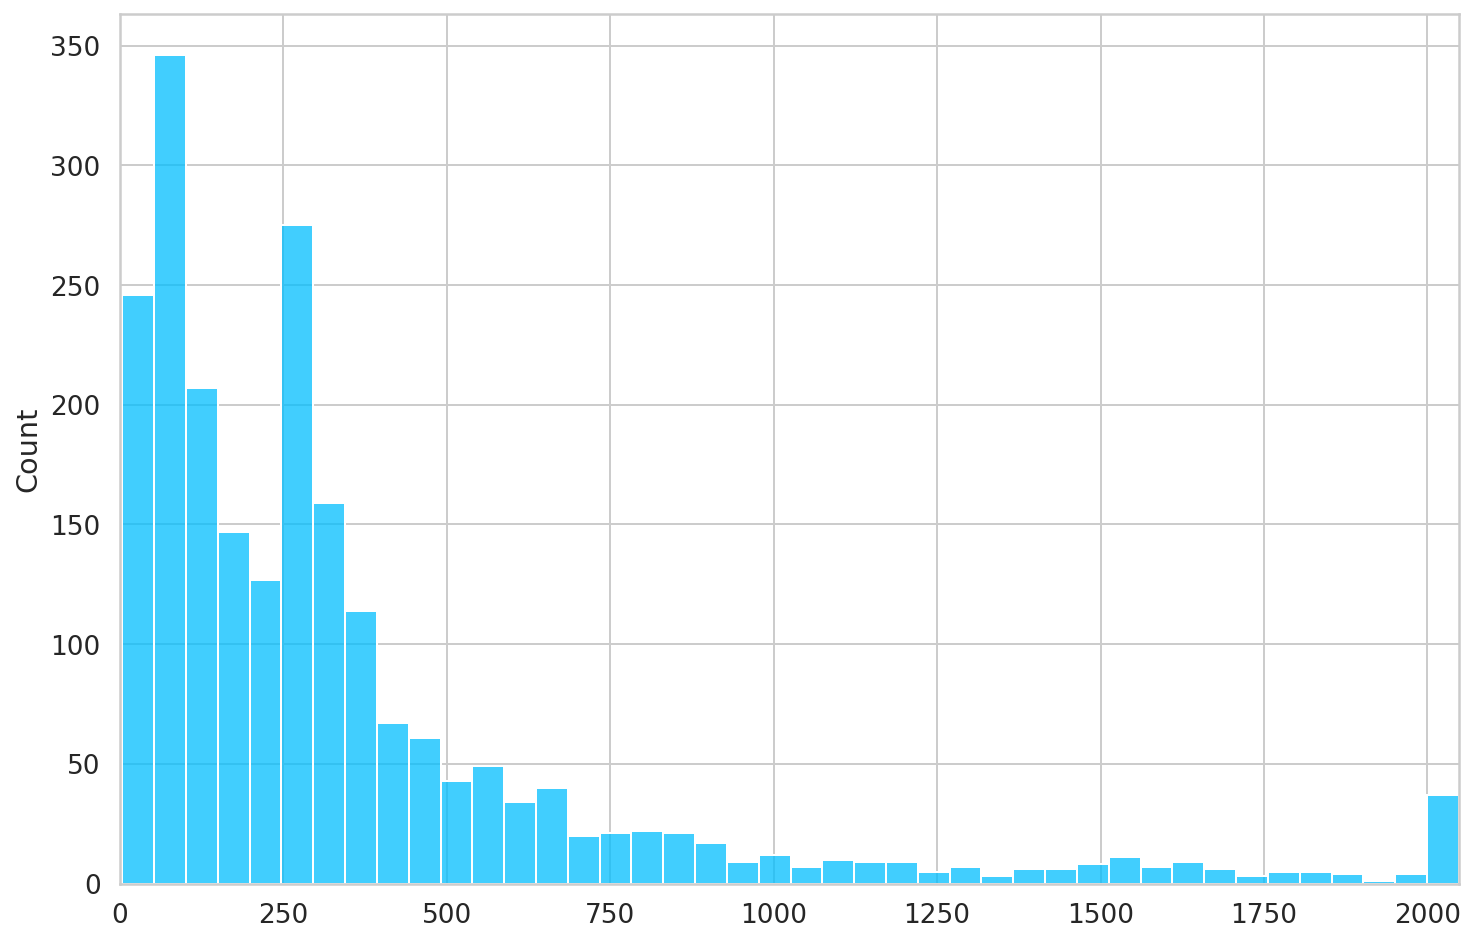

In [ ]:
token_counts = []
for row_index in range(dataset.shape[0]):
  token_count = len(tokenizer.encode(
    dataset[row_index][0],
    max_length=2048,
    truncation=True
  ))
  token_counts.append(token_count)
sns.histplot(token_counts)
plt.xlim([0, 2048]);

In [ ]:
data = np.asarray(token_counts)
print(np.sum(data<MAX_TOKEN_LEN))
print(f"The precentage of the datset {np.sum(data<MAX_TOKEN_LEN) / len(token_counts)} ")

1768

The precentage of the datset 0.8040018190086403

# How much words are there

The mean of the number of Words 1264.412460209186

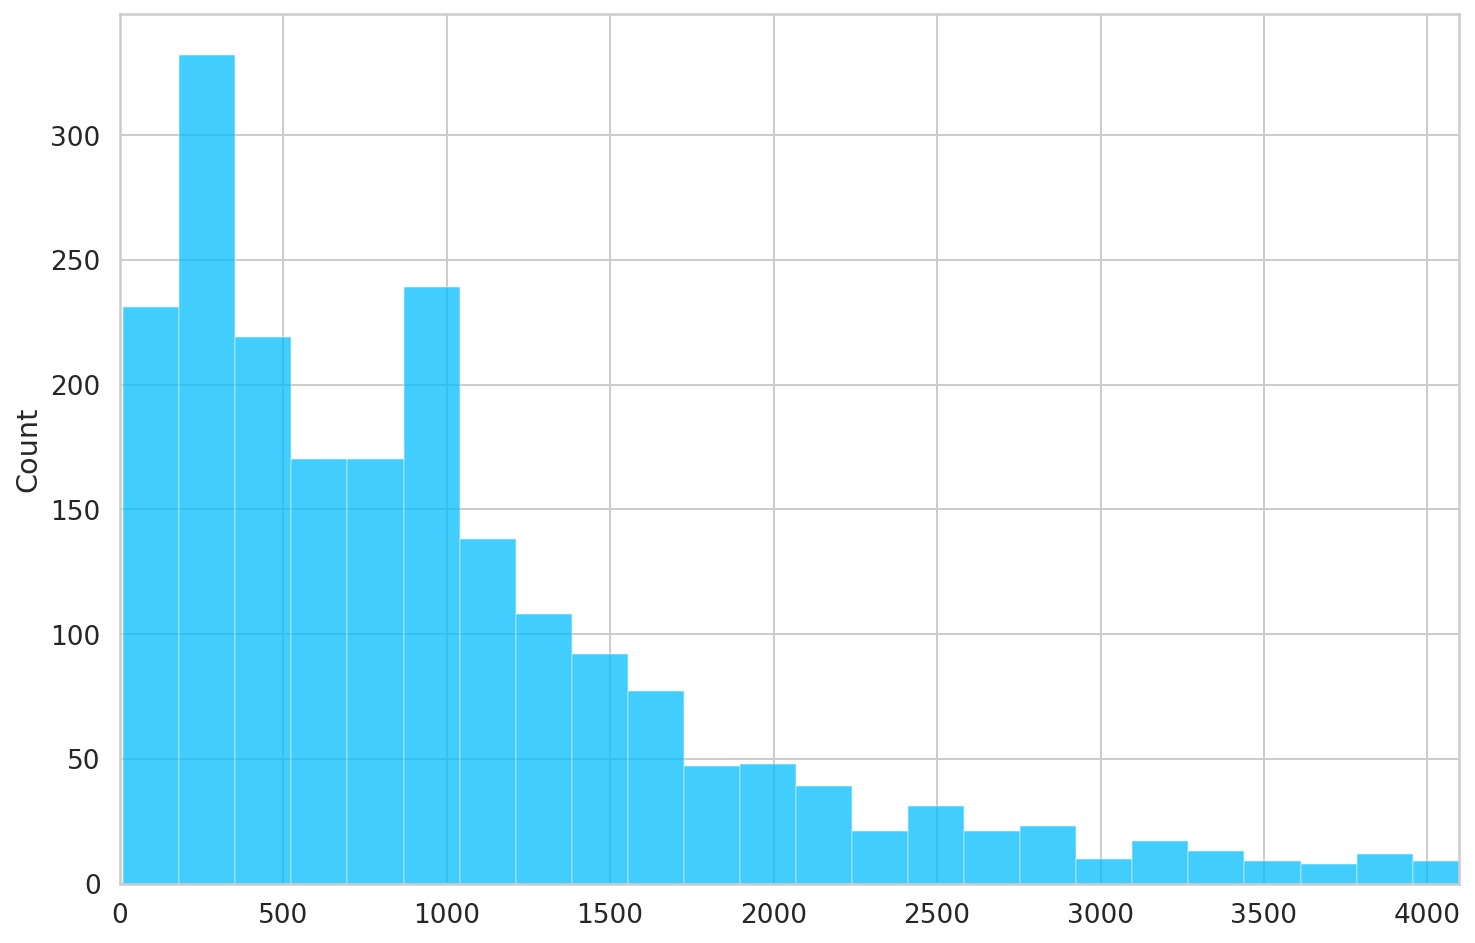

In [ ]:
words_counts = []
for row_index in range(dataset.shape[0]):
  words_counts.append(len(dataset[row_index][0]))
sns.histplot(words_counts)
plt.xlim([0, 4096]);
print(f"The mean of the number of Words {np.mean(words_counts)}")

# Split The dataset to train and Test

In [ ]:
train_ds , test_ds = train_test_split(dataset, test_size=0.33, random_state=42 , shuffle = True)
train_ds , validation_ds = train_test_split(train_ds, test_size=0.33, random_state=42 , shuffle = True)

# NLP Augmentation Pipeline
*   SynonmAug Agumentation
*   Char Random Insertion 
*   Spelling Mistake







In [ ]:
train_ds  = train_ds.tolist()
length_of_the_orginal_dataset = len(train_ds) 

## Synoynm Augmentation

In [ ]:
aug = naw.SynonymAug(aug_src='wordnet' , 
aug_min = 10  ,  
aug_max = 400 , aug_p = 0.3 , 
lang = "eng")
number_of_augmentation = 5
for idx in range(length_of_the_orginal_dataset):
  augmented_texts = aug.augment(train_ds[idx][0],  n = number_of_augmentation )
  assert isinstance(augmented_texts , list)
  assert isinstance(augmented_texts , list)
  for augment_idx in range(number_of_augmentation):
    assert isinstance(augmented_texts[augment_idx] , str)
    augmented_texts[augment_idx] = [augmented_texts[augment_idx] , train_ds[idx][1]]
  train_ds += augmented_texts

## Char Random Insertion

In [ ]:

aug = nac.RandomCharAug(action='insert', 
name='RandomChar_Aug', aug_char_min=1, aug_char_max=100, 
aug_char_p=0.3, aug_word_p=0.3, aug_word_min=1, aug_word_max=10, 
include_upper_case=True, include_lower_case=True, include_numeric=True, 
min_char=4, swap_mode='adjacent', spec_char='!@#$%^&*()_+', stopwords=None, 
tokenizer=None, reverse_tokenizer=None, verbose=0, stopwords_regex=None, candidiates=None)
length_of_the_orginal_dataset = len(train_ds)
for idx in range(length_of_the_orginal_dataset):
  augmented_texts = aug.augment(train_ds[idx][0],  n = number_of_augmentation )
  assert isinstance(augmented_texts , list)
  assert isinstance(augmented_texts , list)
  for augment_idx in range(number_of_augmentation):
    assert isinstance(augmented_texts[augment_idx] , str)
    augmented_texts[augment_idx] = [augmented_texts[augment_idx] , train_ds[idx][1]]
  train_ds += augmented_texts


In [ ]:
## get the shape of train Dataset
## convert the dataset into  a list of tupple
## loop through all list by adding in augmentation 
'''
aug = naw.SpellingAug(dict_path='./spelling_en.txt', aug_min = 1 , aug_max = 15 , aug_p = 0.3)
augmented_length = len(train_ds)
for idx in range(augmented_length):
  augmented_texts = aug.augment(train_ds[idx][0],  n = 2)
  assert isinstance(augmented_texts , list)
  assert isinstance(augmented_texts , list)
  for augment_idx in range(3):
    assert isinstance(augmented_texts[augment_idx] , str)
    augmented_texts[augment_idx] = [augmented_texts[augment_idx] , train_ds[idx][1]]
  train_ds += augmented_texts
train_ds = np.asarray(train_ds)
print(type(type(train_ds)))
print(f"The Shape of Train Dataset {train_ds.shape}")
print(train_ds[:2])
'''
train_ds = np.asarray(train_ds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
print(type(train_ds))
print(type(train_ds[0]))
print(train_ds[0])
print(type(train_ds[986]))
print(train_ds.shape)

<class 'numpy.ndarray'>

<class 'numpy.ndarray'>

['Why after 50% of each epoch training, the process starts to print one line per 
batch?\r\n\r\n```python\r\nEpoch 1:  50%|█████▌     | 126/252 [00:29<00:29,  4.25it/s, 
loss=3.223, v_num=0]\r\nValidating: 0it [00:00, ?it/s]\r\nEpoch 1:  50%|█████▌     | 127/252 
[00:32<00:31,  3.91it/s, loss=3.223, v_num=0]\r\nEpoch 1:  51%|█████▌     | 128/252 
[00:33<00:32,  3.82it/s, loss=3.223, v_num=0]\r\nEpoch 1:  51%|█████▋     | 129/252 
[00:34<00:33,  3.72it/s, loss=3.223, v_num=0]\r\n```'
 list([1297090692])]

<class 'numpy.ndarray'>

(35496, 2)

# Pytorch Dataset for the Open Source

In [ ]:
class OPIsssueDataset(Dataset):
  def __init__(
    self,
    data: pd.DataFrame,
    tokenizer: BertTokenizer,
    max_token_len: int = 128
  ):
    self.tokenizer = tokenizer
    self.data = data
    self.max_token_len = max_token_len
  def __len__(self):
      return self.data.shape[0]
  def __getitem__(self, index):
    #print("Start fetch")
    comment_text = self.data[index][0]
    labels = self.data[index][1]

    encoding = self.tokenizer.encode_plus(
      comment_text,
      add_special_tokens=True,
      max_length=self.max_token_len,
      return_token_type_ids=False,
      padding="max_length",
      truncation=True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    assert isinstance(self.data , np.ndarray)
    return dict(
      comment_text=comment_text,
      input_ids=encoding["input_ids"].flatten(),
      attention_mask=encoding["attention_mask"].flatten(),
      labels=torch.FloatTensor(one_hot_encoder(labels))
    )

# Lightning Data Module

In [ ]:
class OPDataModule(pl.LightningDataModule):
  def __init__(self , train_df ,  validation_df , test_df ,tokenizer , batch_size = 2<<5 , max_token_len=2<<8):
    super().__init__()
    self.batch_size = batch_size
    self.train_df = train_df
    self.test_ds = test_df
    self.validation_ds = validation_df
    self.tokenizer = tokenizer
    self.max_token_len = max_token_len
  def setup(self, stage=None):
    self.train_dataset = OPIsssueDataset(
      self.train_df,
      self.tokenizer,
      self.max_token_len
    )
    self.validation_dataset = OPIsssueDataset(
        self.validation_ds,
        self.tokenizer,
        self.max_token_len
    )
    self.test_dataset = OPIsssueDataset(
      self.test_ds,
      self.tokenizer,
      self.max_token_len
    )
    #assert isinstance()
  def train_dataloader(self):
    return DataLoader(
      self.train_dataset,
      batch_size=self.batch_size,
      shuffle=True,
      num_workers=0
    )
  def val_dataloader(self):
    return DataLoader(
      self.validation_dataset,
      batch_size=self.batch_size,
      num_workers=0
    )
  def test_dataloader(self):
    return DataLoader(
      self.test_dataset,
      batch_size=self.batch_size,
      num_workers=0
    )
data_module = OPDataModule(
    train_df = train_ds,
    validation_df = validation_ds,
    test_df = test_ds,
    tokenizer = tokenizer,
    batch_size = BATCH_SIZE,
    max_token_len = MAX_TOKEN_LEN
)
data_module.setup()
print(data_module.train_dataset)
print(data_module.train_dataset.data)
print(type(data_module.train_dataset.data))
print(type(data_module.train_dataset.data)==np.ndarray)
print(isinstance(data_module.train_dataset.data , np.ndarray))
print(type(data_module.train_dataset.data[0]))
print(data_module.train_dataset.data[0][1])
print(type(data_module.train_dataset.data[0][1]))
'''
for idx ,  data in enumerate(data_module.train_dataset):
  print(data)
  print(type(data))
'''

<__main__.OPIsssueDataset object at 0x7f65b6951110>

[['Why after 50% of each epoch training, the process starts to print one line per 
batch?\r\n\r\n```python\r\nEpoch 1:  50%|█████▌     | 126/252 [00:29<00:29,  4.25it/s, 
loss=3.223, v_num=0]\r\nValidating: 0it [00:00, ?it/s]\r\nEpoch 1:  50%|█████▌     | 127/252 
[00:32<00:31,  3.91it/s, loss=3.223, v_num=0]\r\nEpoch 1:  51%|█████▌     | 128/252 
[00:33<00:32,  3.82it/s, loss=3.223, v_num=0]\r\nEpoch 1:  51%|█████▋     | 129/252 
[00:34<00:33,  3.72it/s, loss=3.223, v_num=0]\r\n```'
  list([1297090692])]
 ["## What does this PR do?\r\nFixes # (issue).\r\n\r\n## PR review    \r\nAnyone in the 
community is free to review the PR once the tests have passed.     \r\nIf we didn't discuss 
your PR in Github issues there's a high chance it will not be merged.\r\n\r\n## Did you have 
fun?\r\nMake sure you had fun coding 🙃\r\n"
  list([1840917107, 1851720487])]
 ['Versions:\r\n```\r\ntorch==1.5\r\npytorch-lightning==0.8.0rc1\r\ncuda=10.1\r\n```\r\nIn 
both O1 and O2 mode and the new ddp `trainer.fit` fails with the following traceback. This 
does not happen with `ddp_spawn`.\r\n\r\nfp16 O2 mode:\r\n```bash\r\n  File "finetune.py", 
line 791, in <module>\r\n    main(args)\r\n  File "finetune.py", line 723, in main\r\n    
trainer: pl.Trainer = generic_train(model, args, early_stopping_callback=True)\r\n  File 
"/home/shleifer/transformers_fork/examples/lightning_base.py", line 428, in generic_train\r\n
trainer.fit(model)\r\n  File 
"/home/shleifer/pytorch-lightning/pytorch_lightning/trainer/trainer.py", line 890, in fit\r\n
self.spawn_ddp_children(model)\r\n  File 
"/home/shleifer/pytorch-lightning/pytorch_lightning/trainer/distrib_data_parallel.py", line 
396, in spawn_ddp_children\r\n    self.ddp_train(local_rank, model, is_master=True)\r\n  File
"/home/shleifer/pytorch-lightning/pytorch_lightning/trainer/distrib_data_parallel.py", line 
472, in ddp_train\r\n    self.run_pretrain_routine(model)\r\n  File 
"/home/shleifer/pytorch-lightning/pytorch_lightning/trainer/trainer.py", line 1050, in 
run_pretrain_routine\r\n    self.train()\r\n  File 
"/home/shleifer/pytorch-lightning/pytorch_lightning/trainer/training_loop.py", line 363, in 
train\r\n    self.run_training_epoch()\r\n  File 
"/home/shleifer/pytorch-lightning/pytorch_lightning/trainer/training_loop.py", line 445, in 
run_training_epoch\r\n    _outputs = self.run_training_batch(batch, batch_idx)\r\n  File 
"/home/shleifer/pytorch-lightning/pytorch_lightning/trainer/training_loop.py", line 621, in 
run_training_batch\r\n    loss, batch_output = optimizer_closure()\r\n  File 
"/home/shleifer/pytorch-lightning/pytorch_lightning/trainer/training_loop.py", line 599, in 
optimizer_closure\r\n    model_ref.backward(self, closure_loss, optimizer, opt_idx)\r\n  File
"/home/shleifer/pytorch-lightning/pytorch_lightning/core/hooks.py", line 155, in backward\r\n
scaled_loss.backward()\r\n  File "/home/shleifer/.conda/envs/nb/lib/python3.7/contextlib.py",
line 119, in __exit__\r\n    next(self.gen)\r\n  File 
"/home/shleifer/.conda/envs/nb/lib/python3.7/site-packages/apex/amp/handle.py", line 123, in 
scale_loss\r\n    optimizer._post_amp_backward(loss_scaler)\r\n  File 
"/home/shleifer/.conda/envs/nb/lib/python3.7/site-packages/apex/amp/_process_optimizer.py", 
line 190, in post_backward_with_master_weights\r\n    models_are_masters=False)\r\n  File 
"/home/shleifer/.conda/envs/nb/lib/python3.7/site-packages/apex/amp/scaler.py", line 119, in 
unscale\r\n    self.unscale_python(model_grads, master_grads, scale)\r\n  File 
"/home/shleifer/.conda/envs/nb/lib/python3.7/site-packages/apex/amp/scaler.py", line 89, in 
unscale_python\r\n    self.dynamic)\r\n  File 
"/home/shleifer/.conda/envs/nb/lib/python3.7/site-packages/apex/amp/scaler.py", line 9, in 
scale_check_overflow_python\r\n    cpu_sum = float(model_grad.float().sum())\r\nRuntimeError:
CUDA error: misaligned address\r\n```\r\n\r\nfeel free to cross post if this is a pytorch 
issue\r\n'
  list([1297090686, 1297090689, 1297090693])]
 ...

<class 'numpy.ndarray'>

True

True

<class 'numpy.ndarray'>

[1297090692]

<class 'list'>

'\nfor idx ,  data in enumerate(data_module.train_dataset):\n  print(data)\n  print(type(data))\n'

In [ ]:
data_module.train_dataset[0]

{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0

# Pytorch Lightnig  Model

In [ ]:
import transformers
from torchmetrics import Accuracy , Recall , Precision , F1Score
class OPClassifier(pl.LightningModule):
  def __init__(self, n_classes: int, n_training_steps=None, n_warmup_steps=None, learning_rate = 2e-5):
    super().__init__()
    self.bert = DistilBertModel.from_pretrained(BERT_MODEL_NAME, return_dict=True)
    self.classifier = nn.Linear(self.bert.config.hidden_size, n_classes)
    self.n_training_steps = n_training_steps
    self.n_warmup_steps = n_warmup_steps
    self.learning_rate = learning_rate
    ##https://discuss.pytorch.org/t/bceloss-are-unsafe-to-autocast/110407
    self.criterion = nn.BCEWithLogitsLoss()
    ## multi-label accuracy classficition
    self.train_acc = Accuracy(subset_accuracy = True , average = "micro" , threshold = 0.5)
    self.test_acc = Accuracy(subset_accuracy = True , average = "micro" , threshold = 0.5)
    self.validation_acc = Accuracy(subset_accuracy = True , average = "micro" , threshold = 0.5)
    ## Recall
    ### Micro
    self.train_micro_recall = Recall(average = "micro" , num_classes = len(one_hot_elements.keys()))
    self.validation_micro_recall = Recall(average = "micro" , num_classes = len(one_hot_elements.keys()))
    self.test_micro_recall = Recall(average = "micro" , num_classes = len(one_hot_elements.keys()))
    ### Weighted
    self.train_weighted_recall = Recall(average = "weighted" , num_classes = len(one_hot_elements.keys()))
    self.validation_weighted_recall = Recall(average = "weighted" , num_classes = len(one_hot_elements.keys()))
    self.test_weighted_recall = Recall(average = "weighted" , num_classes = len(one_hot_elements.keys()))
    ## Precision
    ### Micro
    self.train_micro_precision = Precision(average = "micro" , num_classes = len(one_hot_elements.keys()))
    self.validation_micro_precision = Precision(average = "micro" , num_classes = len(one_hot_elements.keys()))
    self.test_micro_precision = Precision(average = "micro" , num_classes = len(one_hot_elements.keys()))
    ### Weighted
    self.train_weighted_precision  = Precision(average = "weighted" , num_classes = len(one_hot_elements.keys()))
    self.validation_weighted_precision  = Precision(average = "weighted" , num_classes = len(one_hot_elements.keys()))
    self.test_weighted_precision  = Precision(average = "weighted" , num_classes = len(one_hot_elements.keys()))
    ## f1Score
    ### Micro
    self.train_micro_f1score = F1Score(average = "micro" , num_classes = len(one_hot_elements.keys()))
    self.validation_micro_f1score = F1Score(average = "micro" , num_classes = len(one_hot_elements.keys()))
    self.test_micro_f1score = F1Score(average = "micro" , num_classes = len(one_hot_elements.keys()))
    ### Weighted
    self.train_weighted_f1score  = F1Score(average = "weighted" , num_classes = len(one_hot_elements.keys()))
    self.validation_weighted_f1score  = F1Score(average = "weighted" , num_classes = len(one_hot_elements.keys()))
    self.test_weighted_f1score  = F1Score(average = "weighted" , num_classes = len(one_hot_elements.keys()))
  def forward(self, input_ids, attention_mask, labels=None):
    output = self.bert(input_ids = input_ids, attention_mask=attention_mask , output_hidden_states = True)
    output = self.classifier(output.last_hidden_state[:, 0])
    ##https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#torch.nn.BCEWithLogitsLoss
    #output = torch.sigmoid(output)
    loss = 0
    if labels is not None:
        loss = self.criterion(output, labels)
    return loss, output
  def training_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    labels = labels.detach().cpu().type(torch.IntTensor)
    outputs = outputs.detach().cpu()
    self.train_acc(outputs , labels)
    self.train_micro_recall(outputs , labels)
    #self.train_weighted_recall(outputs , labels)
    self.train_micro_precision(outputs , labels)
    #self.train_weighted_precision(outputs , labels)
    self.log("train/micro_precision" , self.train_micro_precision , on_step = True , prog_bar = True)
    #self.log("train/weighted_precision" , self.train_weighted_precision , on_step = True , prog_bar = True)
    self.log("train/micro_recall" , self.train_micro_recall , on_step = True , prog_bar = True)
    #self.log("train/weighted_recall" , self.train_weighted_recall , on_step = True , prog_bar = True)
    self.log("train/subset_accuracy_micro_average"  , self.train_acc , on_step = True , prog_bar = True )
    self.log("train/loss", loss, prog_bar=True)
    return {"loss": loss}
  def validation_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    labels = labels.detach().cpu().type(torch.IntTensor)
    outputs = outputs.detach().cpu()
    self.validation_acc(outputs , labels)
    self.validation_micro_recall(outputs , labels)
    #self.validation_weighted_recall(outputs , labels)
    self.validation_micro_precision(outputs , labels)
    #self.validation_weighted_precision(outputs , labels)
    self.log("validation/micro_precision" , self.validation_micro_precision , on_step = True , prog_bar = True , on_epoch  = True)
    #self.log("validation/weighted_precision" , self.validation_weighted_precision , on_step = True , prog_bar = True , on_epoch = True)
    self.log("validation/micro_recall" , self.validation_micro_recall , on_step = True , prog_bar = True , on_epoch = True)
    #self.log("validation/weighted_recall" , self.validation_weighted_recall , on_step = True , prog_bar = True , on_epoch = True)
    self.log("validation/subset_accuracy_micro_average"  , self.validation_acc , on_step = True , prog_bar = True  , on_epoch = True)
    self.log("validation/loss", loss, prog_bar=True, logger=True)
    return loss
  def test_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    labels = labels.detach().cpu().type(torch.IntTensor)
    outputs = outputs.detach().cpu()
    self.test_acc(outputs , labels)
    self.test_micro_recall(outputs , labels)
    #self.test_weighted_recall(outputs , labels)
    self.test_micro_precision(outputs , labels)
    #self.test_weighted_precision(outputs , labels)
    self.log("test/micro_precision" , self.test_micro_precision , on_step = True , prog_bar = True , on_epoch  = True)
    #self.log("test/weighted_precision" , self.test_weighted_precision , on_step = True , prog_bar = True , on_epoch = True)
    self.log("test/micro_recall" , self.test_micro_recall , on_step = True , prog_bar = True , on_epoch = True)
    #self.log("test/weighted_recall" , self.test_weighted_recall , on_step = True , prog_bar = True , on_epoch = True)
    self.log("test/subset_accuracy_micro_average"  , self.test_acc , on_step = True , prog_bar = True  , on_epoch = True)
    self.log("test/loss", loss, prog_bar=True, logger=True)
    return loss
  '''
  def training_epoch_end(self, outputs):
    labels = []
    predictions = []
    for output in outputs:
      for out_labels in output["labels"].detach().cpu():
        labels.append(out_labels)
      for out_predictions in output["predictions"].detach().cpu():
        predictions.append(out_predictions)
    labels = torch.stack(labels).int()
    predictions = torch.stack(predictions)
    #for i, name in enumerate(LABEL_COLUMNS):
      #class_roc_auc = auroc(predictions[:, i], labels[:, i])
      #self.logger.experiment.add_scalar(f"{name}_roc_auc/Train", class_roc_auc, self.current_epoch)
  '''
  def configure_optimizers(self):
    optimizer = bnb.optim.AdamW8bit(self.bert.parameters(), lr=self.learning_rate, betas=(0.9, 0.995)) # add bnb optimizer
    scheduler = transformers.get_linear_schedule_with_warmup(
      optimizer,
      num_warmup_steps=self.n_warmup_steps,
      num_training_steps=self.n_training_steps
    )
    #return optimizer
    return dict(
      optimizer=optimizer,
      lr_scheduler=dict(
        scheduler=scheduler,
        interval='step'
      )
    )

# Trainer Loop

In [ ]:
steps_per_epoch=len(train_ds) // BATCH_SIZE
total_training_steps = steps_per_epoch * N_EPOCHS
warmup_steps = total_training_steps // 5
print(f"The step for for an epoch {steps_per_epoch}")
print(f"Total Training Steps {total_training_steps}")

The step for for an epoch 1109

Total Training Steps 22180

# Initialize the model

In [ ]:
model = OPClassifier(
  n_classes=len(one_hot_elements.keys()),
  n_warmup_steps=warmup_steps,
  n_training_steps=total_training_steps
)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Check Point

In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
  dirpath="checkpoints",
  filename="best-checkpoint",
  save_top_k=2,
  verbose=True,
  monitor='validation/subset_accuracy_micro_average',
  mode="max"
)

# Logger 

In [ ]:
import imp
try:
    imp.find_module('wandb')
    found = True
except ImportError:
    found = False
print(found)

True

In [ ]:
## Weight and bias =
from pytorch_lightning.loggers import WandbLogger
logger    = WandbLogger(
      project=weight_and_bias_project,
      log_model = "all",
      save_code = True
  )
#logger = TensorBoardLogger("lightning_logs", name="toxic-comments")
print(logger)


<pytorch_lightning.loggers.wandb.WandbLogger object at 0x7f65b4c62990>

# Early Stopping

In [ ]:
early_stopping_callback = EarlyStopping(monitor='validation/subset_accuracy_micro_average', patience=0)

# Training Step

In [ ]:
trainer = pl.Trainer(
  logger=logger,
  checkpoint_callback=True,
  callbacks=[early_stopping_callback , checkpoint_callback],
  max_epochs=N_EPOCHS,
  gpus=1,
  fast_dev_run = False,
  progress_bar_refresh_rate=30,
  precision = "bf16" if torch.cuda.is_bf16_supported() else 16
)

Using 16bit native Automatic Mixed Precision (AMP)
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:152: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=True)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=True)`.
  f"Setting `Trainer(checkpoint_callback={checkpoint_callback})` is deprecated in v1.5 and will "
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:97: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=30)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  f"Setting `Trainer(progress_bar_refresh_rate={progress_bar_refresh_rate})` is deprecated in v1.5 and"
GPU 

# Trainer Fit

In [ ]:
!nvidia-smi -L

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-f7b215bb-f087-92f2-866e-61822342de25)


In [ ]:
torch.cuda.is_bf16_supported()

False

In [ ]:
print(type(data_module))
trainer.fit(model , data_module )
trainer.test(model , data_module , ckpt_path="best")
wandb.finish()

<class '__main__.OPDataModule'>

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:608: UserWarning: Checkpoint directory /content/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                          | Type              | Params
---------------------------------------------------------------------
0  | bert                          | DistilBertModel   | 66.4 M
1  | classifier                    | Linear            | 29.2 K
2  | criterion                     | BCEWithLogitsLoss | 0     
3  | train_acc                     | Accuracy          | 0     
4  | test_acc                      | Accuracy          | 0     
5  | validation_acc                | Accuracy          | 0     
6  | train_micro_recall            | Recall            | 0     
7  | validation_micro_recall       | Recall            | 0     
8  | test_micro_recall             | Recall            | 0    

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 1110: 'validation/subset_accuracy_micro_average' reached 0.06571 (best 0.06571), saving model to '/content/checkpoints/best-checkpoint-v2.ckpt' as top 2


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 2220: 'validation/subset_accuracy_micro_average' reached 0.24230 (best 0.24230), saving model to '/content/checkpoints/best-checkpoint-v3.ckpt' as top 2
Restoring states from the checkpoint path at /content/checkpoints/best-checkpoint-v3.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /content/checkpoints/best-checkpoint-v3.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃               Test metric                ┃               DataLoader 0               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│                test/loss                 │           0.22474418580532074            │
│        test/micro_precision_epoch        │            0.8501628637313843            │
│         test/micro_recall_epoch          │            0.3681241273880005            │
│ test/subset_accuracy_micro_average_epoch │           0.22727273404598236            │
└──────────────────────────────────────────┴──────────────────────────────────────────┘

epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁████████████████████
test/loss,▁
test/micro_precision_epoch,▁
test/micro_precision_step,▅▃▆▂▄▄▅▂▃█▅▂▄▂▅▄▄▇▄▇▂▂▁
test/micro_recall_epoch,▁
test/micro_recall_step,▅▂▅▃▂▃▃▂▃▂▃▃▆▂▄▁▃█▃▅▁▄▂
test/subset_accuracy_micro_average_epoch,▁
test/subset_accuracy_micro_average_step,▆▂▃▂▃▂▃▁▄▂▂▂▅▃▃▂▂█▂▄▁▃▃
train/loss,██▇▅▄▃▂▂▂▂▂▂▁▁▂▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/micro_precision,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▅▇▆███▇▇▇▆█▇▇▇▇█▇████▇█
train/micro_recall,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▃▁▂▄▃▆▆▆▆▅▅▇▇█▇▇███▇▇█


In [ ]:
checkpoint_callback.best_model_path

'/content/checkpoints/best-checkpoint-v3.ckpt'

# Sweep

In [ ]:
sweep_config = {
  "name" : "my-sweep",
  "method" : "bayes",
  "parameters" : {
    "learning_rate" :{
      "min": 0.0001,
      "max": 0.1
    }
  }
}


In [ ]:
def sweep_function():
  with wandb.init() as runn:
    config = wandb.config
    model = OPClassifier(
    n_classes=len(one_hot_elements.keys()),
    n_warmup_steps=warmup_steps,
    n_training_steps=total_training_steps,
    learning_rate = config["learning_rate"]
    )
    model = OPClassifier(
      n_classes=len(one_hot_elements.keys()),
      n_warmup_steps=warmup_steps,
      n_training_steps=total_training_steps
    )
    checkpoint_callbacks = ModelCheckpoint(
      dirpath="checkpoints",
      filename="best-checkpoint",
      save_top_k=1,
      verbose=True,
      monitor='validation/subset_accuracy_micro_average',
      mode="min"
    )
    early_stopping_callback = EarlyStopping(monitor='validation/subset_accuracy_micro_average', patience=0)
    trainer = pl.Trainer(
      logger=logger,
      checkpoint_callback=checkpoint_callbacks,
      callbacks=[early_stopping_callback],
      max_epochs=N_EPOCHS,
      gpus=1,
      fast_dev_run = False,
      progress_bar_refresh_rate=30,
      precision = "bf16" if torch.cuda.is_bf16_supported() else 16
    )
    print(type(data_module))
    trainer.fit(model , data_module )
    trainer.test(model , data_module , ckpt_path="best")

# Predictions

In [ ]:
trained_model = OPClassifier.load_from_checkpoint(
  trainer.checkpoint_callback.best_model_path,
  n_classes=len(LABEL_COLUMNS)
)
trained_model.eval()
trained_model.freeze()

NameError: ignored

In [ ]:
torch.cuda.empty_cache()

# Citation


In [ ]:
'''
@misc{dettmers2021optim8bit,
      title={8-bit Optimizers via Block-wise Quantization},
      author={Tim Dettmers and Mike Lewis and Sam Shleifer and Luke Zettlemoyer},
      year={2021},
      eprint={2110.02861},
      archivePrefix={arXiv},
      primaryClass={cs.LG}
}
https://curiousily.com/posts/multi-label-text-classification-with-bert-and-pytorch-lightning/
https://devblog.pytorchlightning.ai/introducing-faster-training-with-lightning-and-brain-float16-861505eabbfc
https://devblog.pytorchlightning.ai/introducing-faster-training-with-lightning-and-brain-float16-861505eabbfc
''''